In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

In [11]:
import os
os.getcwd()

'd:\\Bala\\Recruitment_Prediction'

In [12]:
df = pd.read_csv(r"recruitment_data.csv")

In [13]:
df.head()

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,HiringDecision
0,26,1,2,0,3,26.783828,48,78,91,1,1
1,39,1,4,12,3,25.862694,35,68,80,2,1
2,48,0,2,3,2,9.920805,20,67,13,2,0
3,34,1,2,5,2,6.407751,36,27,70,3,0
4,30,0,1,6,1,43.105343,23,52,85,2,0


In [14]:
df.shape

(1500, 11)

In [15]:
# Display summary statistics for a dataframe
df.describe()

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,HiringDecision
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,35.148667,0.492000,2.188000,7.694000,3.00200,25.505379,50.564000,51.116000,49.387333,1.893333,0.310000
std,9.252728,0.500103,0.862449,4.641414,1.41067,14.567151,28.626215,29.353563,29.353201,0.689642,0.462647
min,20.000000,0.000000,1.000000,0.000000,1.00000,1.031376,0.000000,0.000000,0.000000,1.000000,0.000000
25%,27.000000,0.000000,2.000000,4.000000,2.00000,12.838851,25.000000,25.750000,23.000000,1.000000,0.000000
50%,35.000000,0.000000,2.000000,8.000000,3.00000,25.502239,52.000000,53.000000,49.000000,2.000000,0.000000
75%,43.000000,1.000000,3.000000,12.000000,4.00000,37.737996,75.000000,76.000000,76.000000,2.000000,1.000000
max,50.000000,1.000000,4.000000,15.000000,5.00000,50.992462,100.000000,100.000000,100.000000,3.000000,1.000000


In [16]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1500 non-null   int64  
 1   Gender               1500 non-null   int64  
 2   EducationLevel       1500 non-null   int64  
 3   ExperienceYears      1500 non-null   int64  
 4   PreviousCompanies    1500 non-null   int64  
 5   DistanceFromCompany  1500 non-null   float64
 6   InterviewScore       1500 non-null   int64  
 7   SkillScore           1500 non-null   int64  
 8   PersonalityScore     1500 non-null   int64  
 9   RecruitmentStrategy  1500 non-null   int64  
 10  HiringDecision       1500 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 129.0 KB


In [17]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 11 numerical features : ['Age', 'Gender', 'EducationLevel', 'ExperienceYears', 'PreviousCompanies', 'DistanceFromCompany', 'InterviewScore', 'SkillScore', 'PersonalityScore', 'RecruitmentStrategy', 'HiringDecision']

We have 0 categorical features : []


In [22]:
unique_value_count = dict()

for i in df.columns:
    unique_value_count[i] = len(df[i].unique())

unique_value_count

{'Age': 31,
 'Gender': 2,
 'EducationLevel': 4,
 'ExperienceYears': 16,
 'PreviousCompanies': 5,
 'DistanceFromCompany': 1500,
 'InterviewScore': 101,
 'SkillScore': 101,
 'PersonalityScore': 101,
 'RecruitmentStrategy': 3,
 'HiringDecision': 2}

In [23]:
unique_values = dict()

for i in df.columns:
    if len(df[i].unique()) <=10:
        unique_values[i] = [df[i].unique()]

unique_values

{'Gender': [array([1, 0], dtype=int64)],
 'EducationLevel': [array([2, 4, 1, 3], dtype=int64)],
 'PreviousCompanies': [array([3, 2, 1, 4, 5], dtype=int64)],
 'RecruitmentStrategy': [array([1, 2, 3], dtype=int64)],
 'HiringDecision': [array([1, 0], dtype=int64)]}

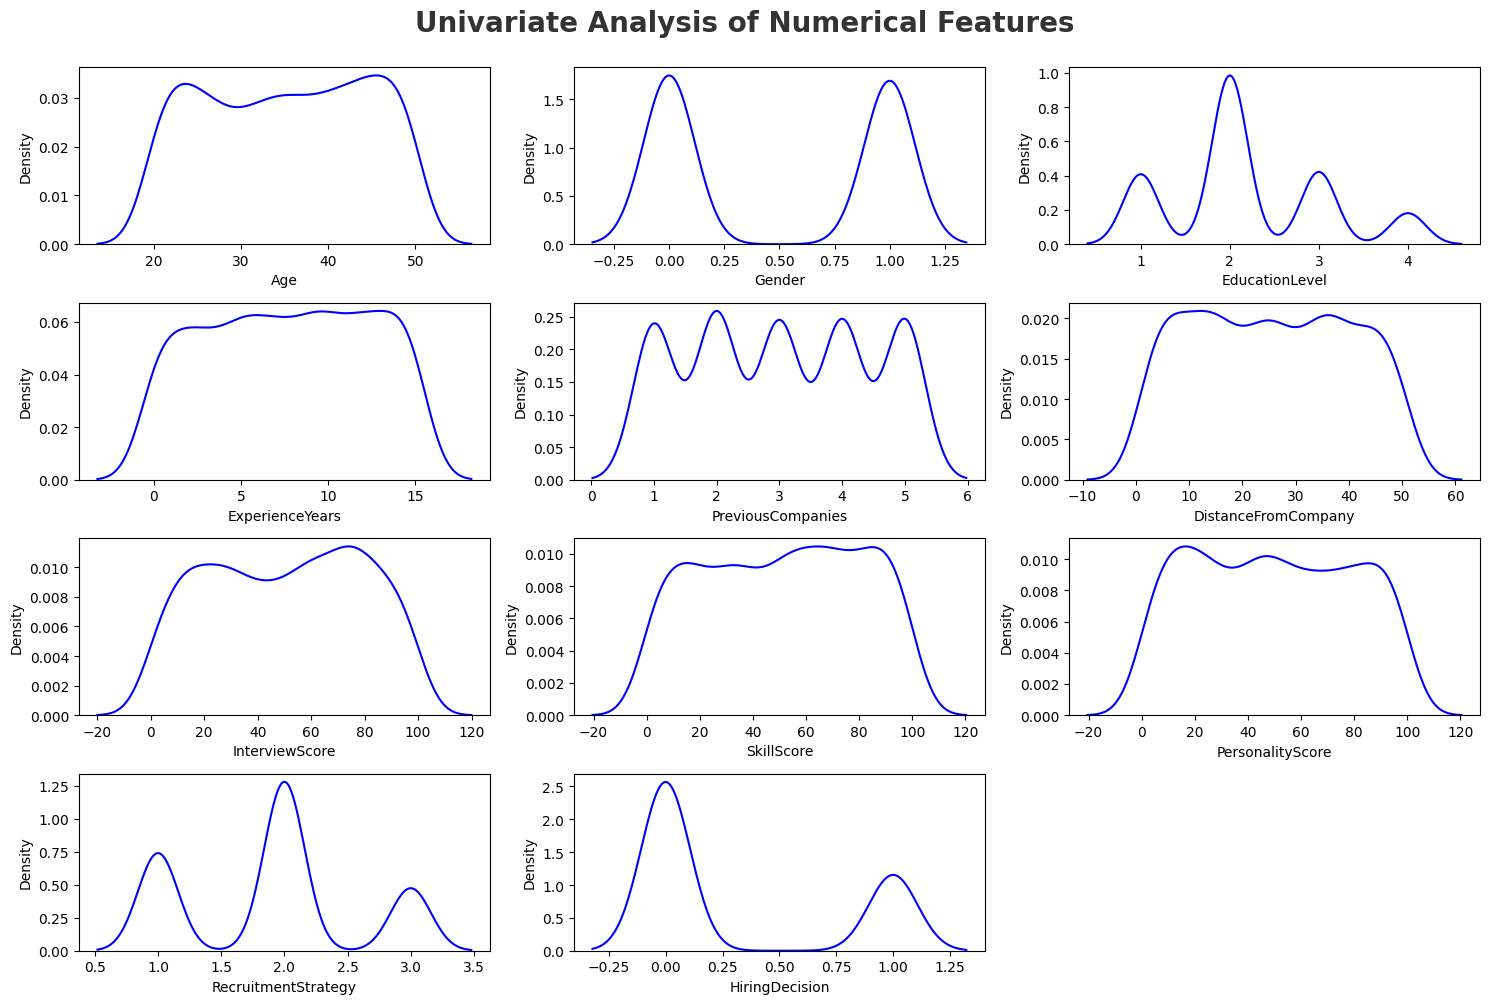

In [20]:
plt.figure(figsize=(15, 10))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(4, 3, i+1)
    sns.kdeplot(x=df[numeric_features[i]], color='blue')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()
    
# save plot
# plt.savefig('./images/Univariate_Num.png')

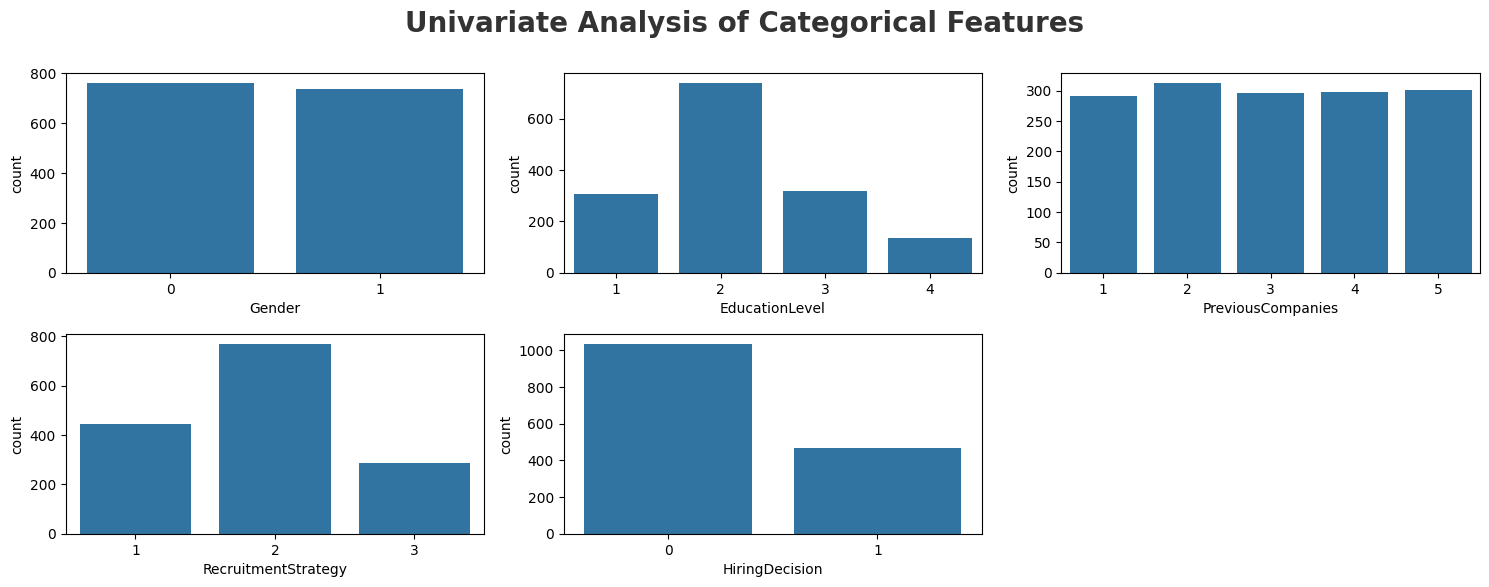

In [24]:
# categorical columns
categorical_features = ['Gender',"EducationLevel","PreviousCompanies","RecruitmentStrategy","HiringDecision"]
plt.figure(figsize=(15, 8))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(categorical_features)):
    plt.subplot(3, 3, i+1)
    sns.countplot(x=df[categorical_features[i]])
    plt.xlabel(categorical_features[i])
    plt.tight_layout()
    
# save plot
# plt.savefig('./images/Univariate_Cat.png')

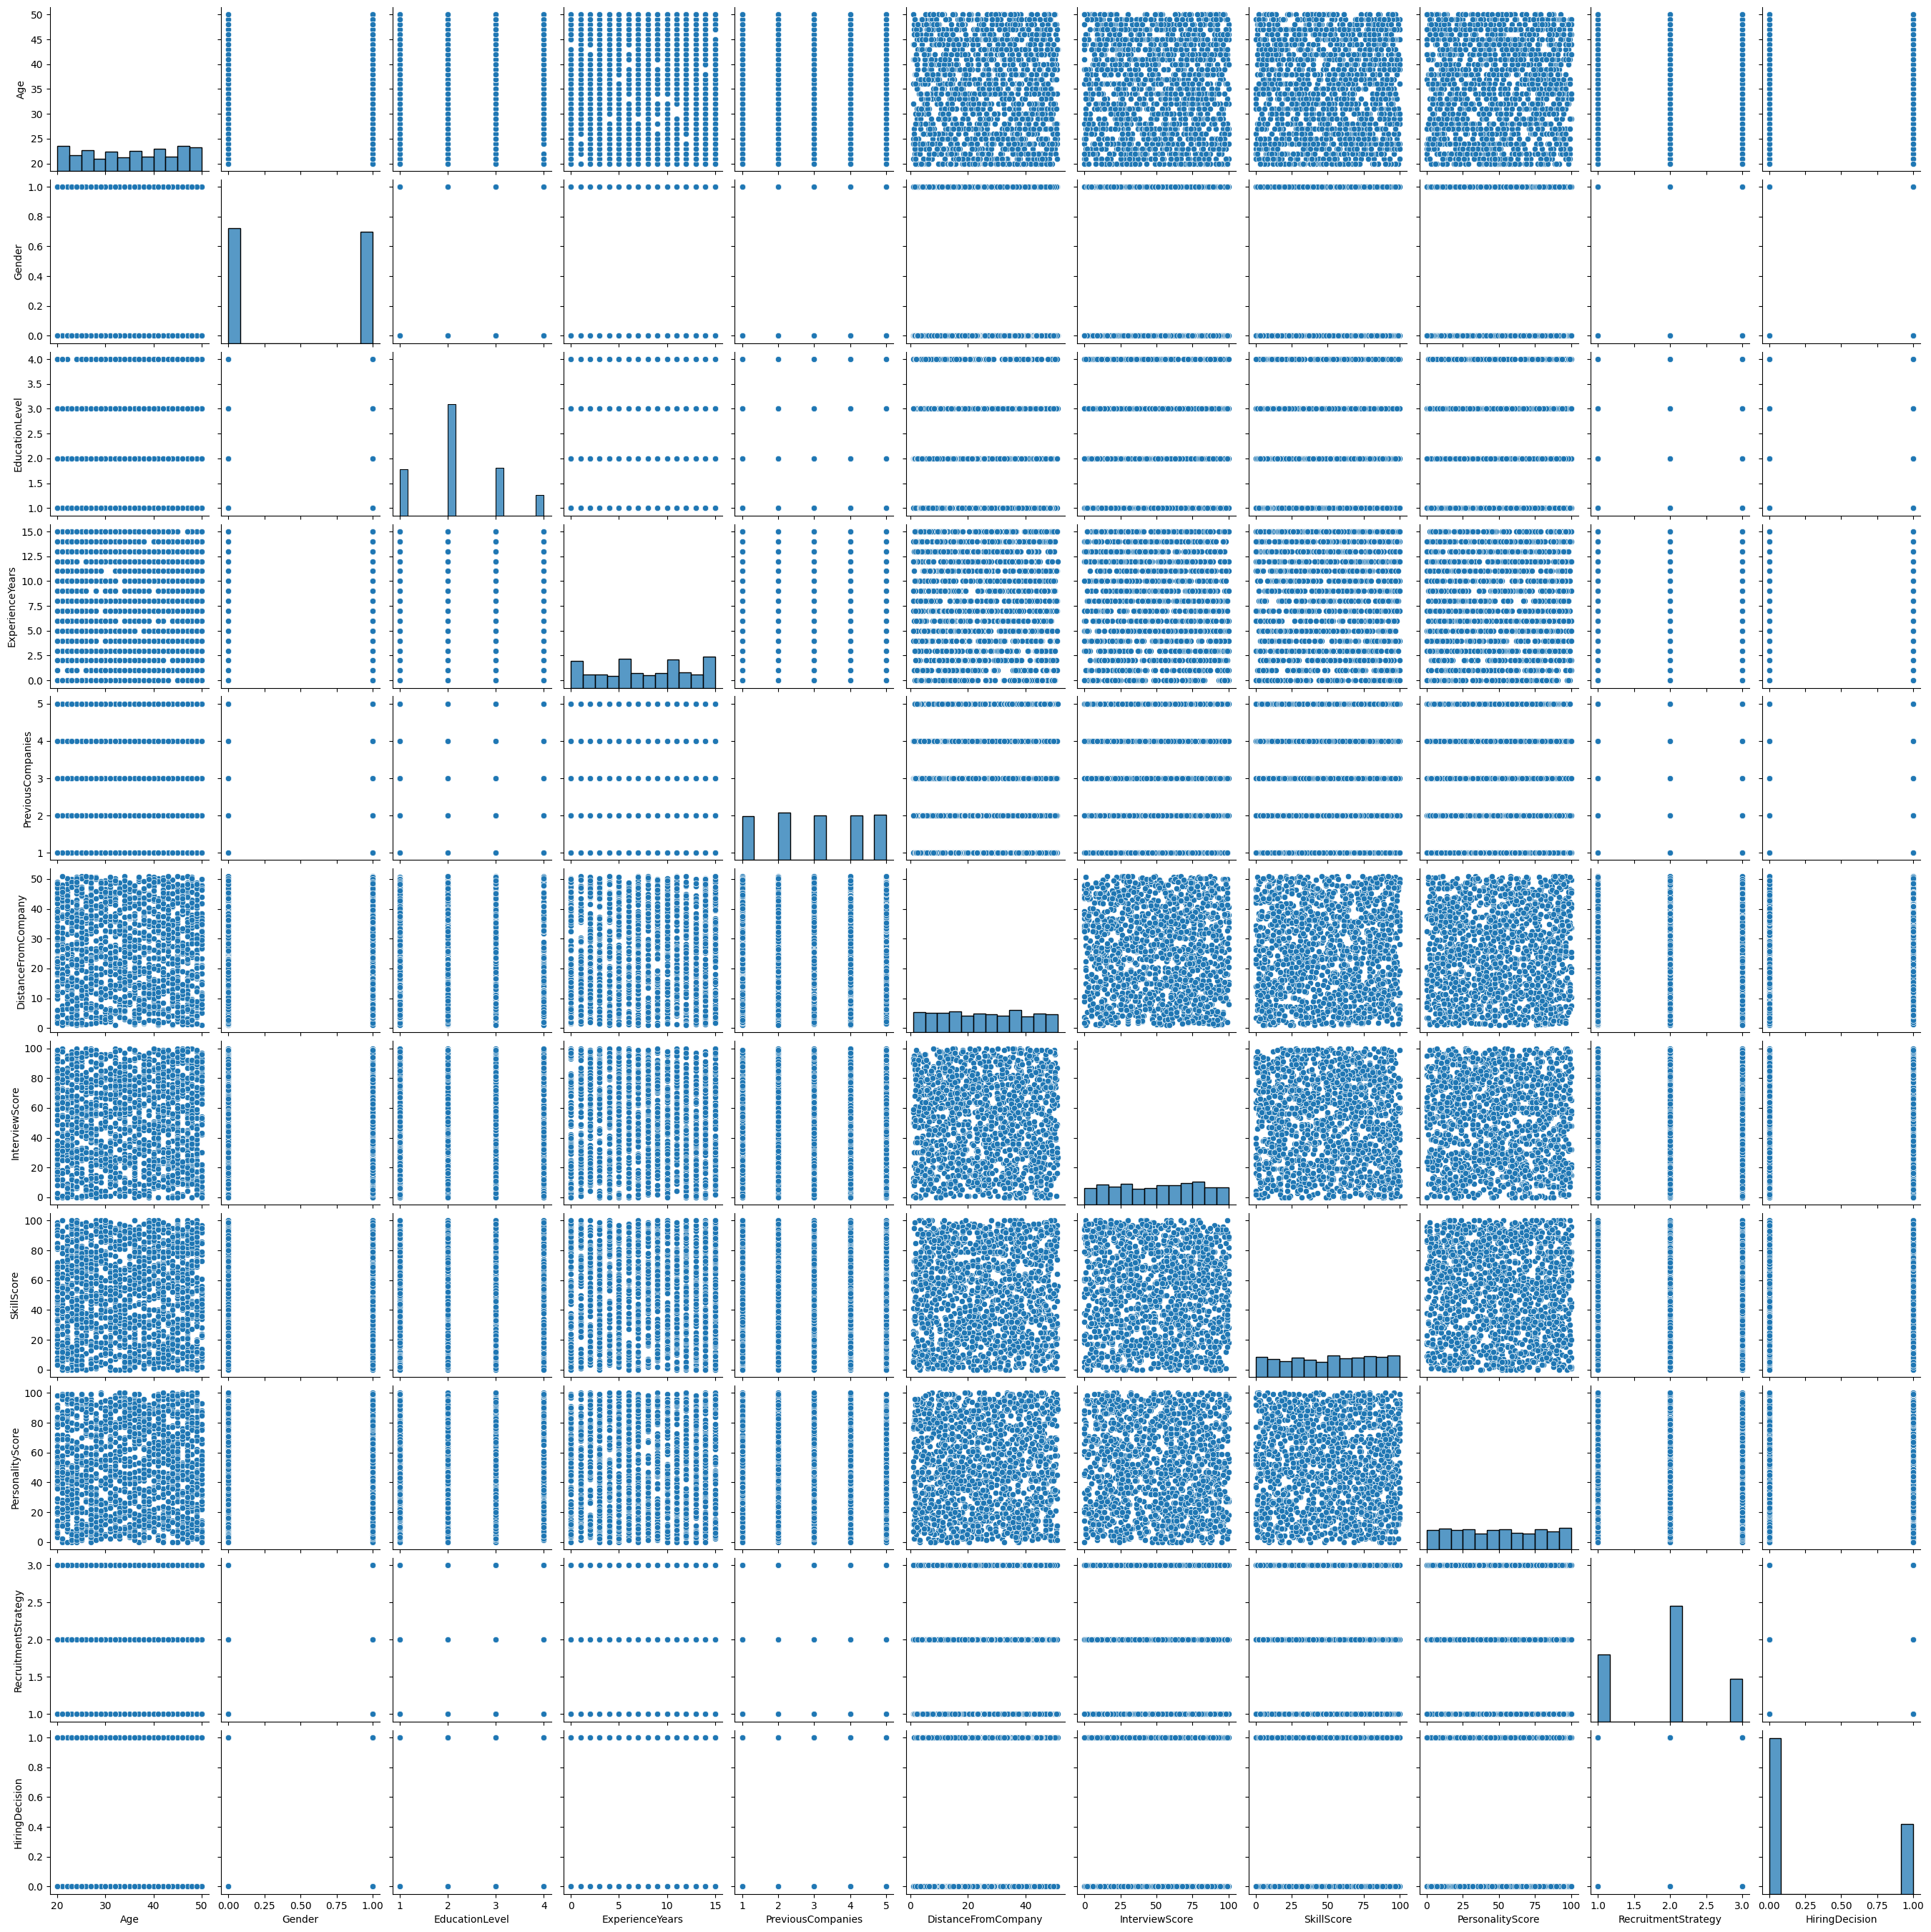

In [25]:
sns.pairplot(df)

In [26]:
discrete_features=[feature for feature in numeric_features if len(df[feature].unique())<=25]

continuous_features=[feature for feature in numeric_features if len(df[feature].unique()) > 25]

print('We have {} discrete features : {}'.format(len(discrete_features), discrete_features))
print('\nWe have {} continuous_features : {}'.format(len(continuous_features), continuous_features))

We have 6 discrete features : ['Gender', 'EducationLevel', 'ExperienceYears', 'PreviousCompanies', 'RecruitmentStrategy', 'HiringDecision']

We have 5 continuous_features : ['Age', 'DistanceFromCompany', 'InterviewScore', 'SkillScore', 'PersonalityScore']


In [29]:
from scipy.stats import chi2_contingency
chi2_test = []
for feature in categorical_features:
    if chi2_contingency(pd.crosstab(df['HiringDecision'], df[feature]))[1] < 0.05:
        chi2_test.append('Reject Null Hypothesis')
    else:
        chi2_test.append('Fail to Reject Null Hypothesis')
result = pd.DataFrame(data=[categorical_features, chi2_test]).T
result.columns = ['Column', 'Hypothesis Result']
result

,Column,Hypothesis Result
0,Gender,Fail to Reject Null Hypothesis
1,EducationLevel,Reject Null Hypothesis
2,PreviousCompanies,Fail to Reject Null Hypothesis
3,RecruitmentStrategy,Reject Null Hypothesis
4,HiringDecision,Reject Null Hypothesis


In [30]:
df.isnull().sum()

Age                    0
Gender                 0
EducationLevel         0
ExperienceYears        0
PreviousCompanies      0
DistanceFromCompany    0
InterviewScore         0
SkillScore             0
PersonalityScore       0
RecruitmentStrategy    0
HiringDecision         0
dtype: int64

In [31]:
continues_features=[feature for feature in numeric_features if len(df[feature].unique())>=10]
print('Num of continues features :',continues_features)

Num of continues features : ['Age', 'ExperienceYears', 'DistanceFromCompany', 'InterviewScore', 'SkillScore', 'PersonalityScore']


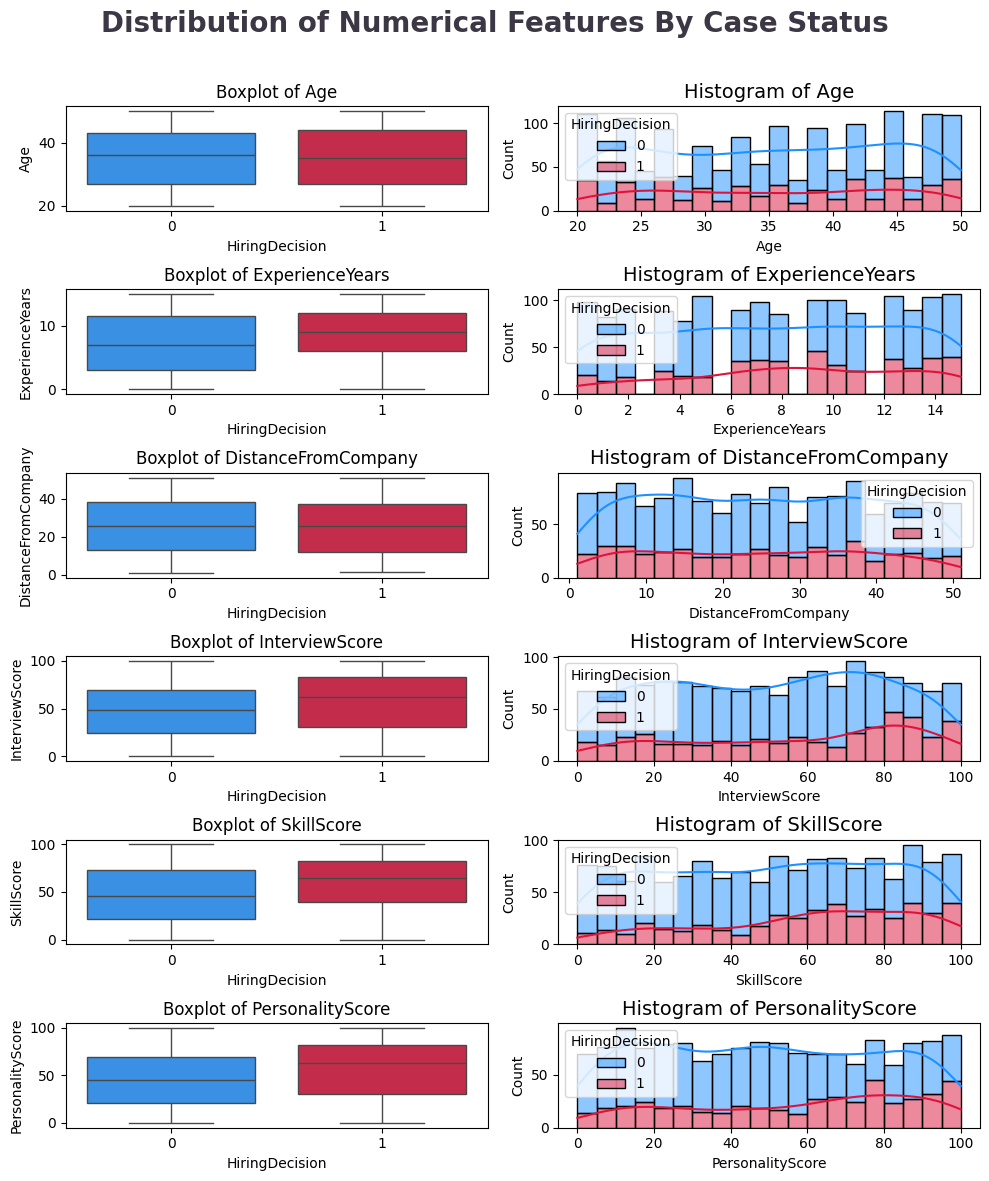

In [35]:
clr1 = ['#1E90FF', '#DC143C']
fig, ax = plt.subplots(6, 2, figsize=(10,12))
fig.suptitle('Distribution of Numerical Features By Case Status', color='#3C3744',
             fontsize=20, fontweight='bold', ha='center')
for i, col in enumerate(continues_features):   
    sns.boxplot(data=df, x='HiringDecision', y=col,  palette=clr1, ax=ax[i,0])
    ax[i,0].set_title(f'Boxplot of {col}', fontsize=12)
    sns.histplot(data=df, x=col, hue='HiringDecision', bins=20, kde=True, 
                 multiple='stack', palette=clr1, ax=ax[i,1])
    ax[i,1].set_title(f'Histogram of {col}', fontsize=14)
fig.tight_layout()
fig.subplots_adjust(top=0.90)
# plt.savefig('images/multivariate_num.png')

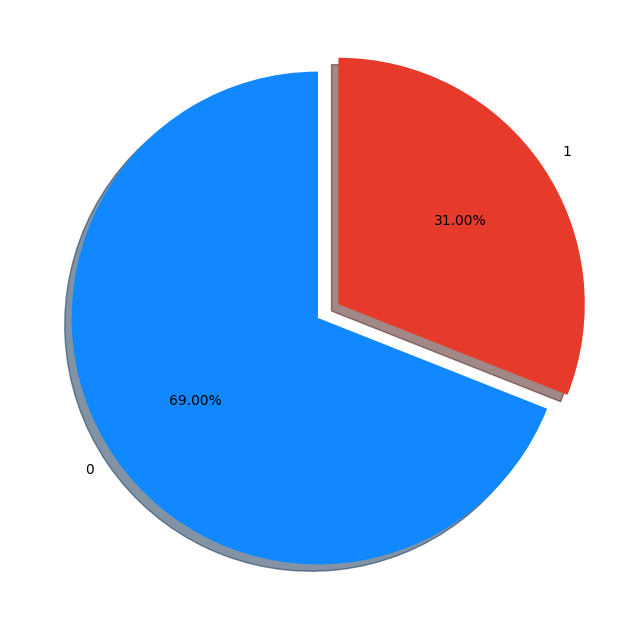

In [36]:
percentage = df['HiringDecision'].value_counts(normalize=True)*100
labels = ["0","1"]

# Plot PieChart with Ploty library
fig, ax = plt.subplots(figsize =(15, 8))
explode = (0, 0.1)
colors = ['#1188ff','#e63a2a']
ax.pie(percentage, labels = labels, startangle = 90,
       autopct='%1.2f%%',explode=explode, shadow=True, colors=colors)
plt.show()

In [38]:
#group data by continent and their count of case_status
df.groupby('Age')['HiringDecision'].value_counts(normalize=True).to_frame()*100

proportion
Age HiringDecision            
20  0                62.500000
    1                37.500000
21  0                76.086957
    1                23.913043
22  0                84.210526
...                        ...
48  1                31.250000
49  0                61.904762
    1                38.095238
50  0                73.913043
    1                26.086957

[62 rows x 1 columns]

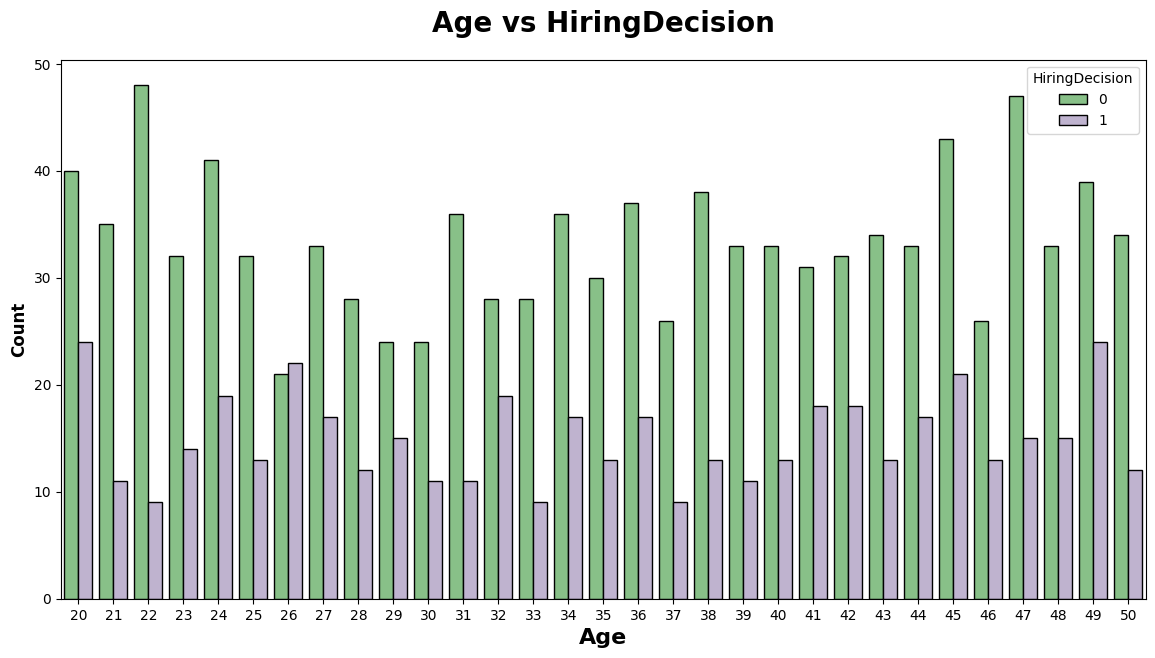

In [39]:
plt.subplots(figsize=(14,7))
sns.countplot(x="Age",hue="HiringDecision", data=df, ec = "black",palette="Accent")
plt.title("Age vs HiringDecision", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Age", weight="bold", fontsize=16)
plt.legend(title="HiringDecision", fancybox=True)
plt.show()

In [40]:
df2 = df.copy()

In [44]:
df.columns

Index(['Age', 'Gender', 'EducationLevel', 'ExperienceYears',
       'PreviousCompanies', 'DistanceFromCompany', 'InterviewScore',
       'SkillScore', 'PersonalityScore', 'RecruitmentStrategy',
       'HiringDecision'],
      dtype='object')

In [49]:
df.groupby('ExperienceYears')['HiringDecision'].value_counts(normalize=True).to_frame()*100

proportion
ExperienceYears HiringDecision            
0               0                79.591837
                1                20.408163
1               0                82.926829
                1                17.073171
2               0                80.000000
                1                20.000000
3               0                71.590909
                1                28.409091
4               0                75.641026
                1                24.358974
5               0                82.692308
                1                17.307692
6               0                60.674157
                1                39.325843
7               0                63.265306
                1                36.734694
8               0                58.823529
                1                41.176471
9               0                54.000000
                1                46.000000
10              0                69.000000
                1                31.000000
11              0                70.930233
                1                29.069767
12              0                64.423077
                1                35.576923
13              0                68.539326
                1                31.460674
14              0                63.106796
                1                36.893204
15              0                62.264151
                1                37.735849